# Proof by Pixel


# Part IV: Map Archive Mining

By Kaspar von Beelen and Daniel van Strien

© von/van van/von GmbH.\*

\*Again: limited liability! demo version! typo warning! 

### Content Analysis

This Notebook provides you with code to repeat (parts of) the analysis of the (Uhl et al., 2018) paper. More specifically, we created tools to apply their content analysis to "our" OS maps (with the important caveat that we use grayscale images instead of RGB). 

The leading question throughout this Notebook is: can we use a similar approach to analysing the OS maps, or do we need to extend their method?

We assume you are familiar with the Python syntax introduced in Part III but aim to decorate the code below with some explanations.

### Loading and opening images

Download the folders from the [Google Drive](https://drive.google.com/drive/folders/1br3Azp4VYGd1tJCE42TcCBN16xYhsWaR?usp=sharing)

Upload all the maps in the "converted" folder to the Colab Notebook running the Python statements below.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 101965655_conv.jpeg to 101965655_conv.jpeg
Saving 101965742_conv.jpeg to 101965742_conv.jpeg
Saving 101965802.27_conv.jpeg to 101965802.27_conv.jpeg


Use OpenCV to read the image.

In [0]:
import cv2 as cv # import OpenCV
import matplotlib.pyplot as plt # plotting tools
import numpy as np # numpy

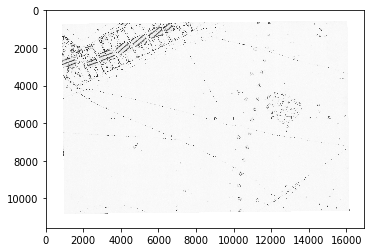

In [0]:
image = cv.imread("101965655_conv.jpeg",cv.IMREAD_GRAYSCALE) #  Read image as grayscale
plt.imshow(image,cmap="Greys_r")

Before we continue, let's remove the annoying white borders from the image.

A **free pint** for the person who can find a more elegant solution to the one shown below!\*

\* To collect in person after the Hackday

(10171, 15163)


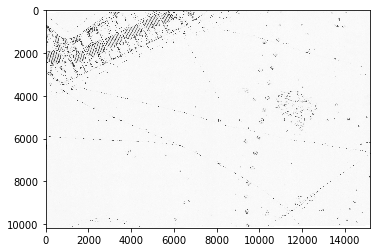

In [0]:
buffer = 50 # some extra pixels we want to discard
for axis in [0,1]:
  exec(f'non_zero_{axis} = np.where(np.mean(image,axis={axis}) < 255)')
  exec('s_{0},e_{0} = np.min(non_zero_{0}),np.max(non_zero_{0})'.format(axis))
image = image[s_1+buffer:e_1-buffer,s_0+buffer:e_0-buffer]
print(image.shape)
plt.imshow(image,cmap="Greys_r")

Once we start chopping, we can't stop. So let's chop some more.

### Chopping the maps into squares

The analysis below looks at variation _within_ maps (instead of across maps). For convenience, we divide the map into square segments. The function `grid_segments` takes care of this process, you only have to provide an image, and set the chunk size.

It will return you a Python dictionary (which will be explained in just a second).

To load `grid_segment` into memory, just run the next cell.

In [0]:
def grid_segment(image,segment_size=1000):
  """segment the image by dividing it into squares
  Args:
    image (numpy.ndarray): image to segment
    segment_size (int): the size of the squares
  Returns:
    segments (dict): maps the coordinates of a segment's top-left corner 
                     to the map segment
  """
  height,width = image.shape
  segments = {}
  for y in range(0,height-segment_size,segment_size):
    for x in range(0,width-segment_size,segment_size):
        segment = image[y:y+segment_size,x:x+segment_size]
        segments[(x,y)]=segment
  
  return segments
        
       

Call `grid_segment` and divide the map into square patches.

In [0]:
segments = grid_segment(image,1000)

What happened? This happened!

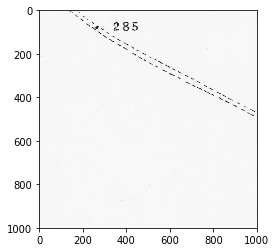

In [0]:
import matplotlib.pyplot as plt
plt.imshow(segments[(1000, 4000)],cmap='Greys_r')

Now you can access individual segments; you can retrieve them by passing the coordinates of the top-left corner to the `segments` dictionary object. 

#### Exercise

Try to retrieve other areas on the map.

E.g. try `(2000, 1000)`

In [0]:
# enter code here

### Intermezzo: Python dictionaries

To properly understand the previous syntax, we should quickly introduce you to Python dictionaries.  

A dictionary is a mapping between two sources of information. For example, think about a "real" German-English dictionary, which maps words from one language to the other.

We can make a very simple German to English dictionary, quoting (and translating) the infamous [Mo-Do](https://www.youtube.com/watch?v=dSy2DcATYUo)

In [0]:
german2english = {"einz":"one",
                  "zwei":"two",
                  "Polizei":"police"}

Please note:
- the items in the dictionary are separated by a comma
- each item is subsequently divided by a colon, with the German words on the left-hand side, the English words on the right-hand side.
- in Python jargon, the German words are called the ~~die Schlüssel~~, sorry "keys" of the dictionary, the English translations are the "values".

Once we created the mapping we can easily call up a translation of a word in our German-to-English mini-dictionary.

In [0]:
german2english["einz"]

'one'

Technically, we ask what value is associated with the key "einz" in the `german2english` object.

In [0]:
# what is "zwei" in English?
# don't cheat, use the Python
# enter code here

We can view all the keys (or values), using `.keys()`(or `.values()`).

In [0]:
german2english.keys()

dict_keys(['einz', 'zwei', 'Polizei'])

In [0]:
german2english.values()

dict_values(['one', 'two', 'police'])

`items()` prints (key, value) pairs as tuples (but we won't explain the latter data type, phew)

In [0]:
german2english.items()

dict_items([('einz', 'one'), ('zwei', 'two'), ('Polizei', 'police')])

### From Mo-Do back to maps

The above principles also apply to our `segments` dictionary. To show the available keys (by which we can retrieve the individual segments) simply use the `.keys()` method.

In [0]:
segments.keys()

dict_keys([(0, 0), (1000, 0), (2000, 0), (3000, 0), (4000, 0), (5000, 0), (6000, 0), (7000, 0), (8000, 0), (9000, 0), (10000, 0), (11000, 0), (12000, 0), (13000, 0), (14000, 0), (0, 1000), (1000, 1000), (2000, 1000), (3000, 1000), (4000, 1000), (5000, 1000), (6000, 1000), (7000, 1000), (8000, 1000), (9000, 1000), (10000, 1000), (11000, 1000), (12000, 1000), (13000, 1000), (14000, 1000), (0, 2000), (1000, 2000), (2000, 2000), (3000, 2000), (4000, 2000), (5000, 2000), (6000, 2000), (7000, 2000), (8000, 2000), (9000, 2000), (10000, 2000), (11000, 2000), (12000, 2000), (13000, 2000), (14000, 2000), (0, 3000), (1000, 3000), (2000, 3000), (3000, 3000), (4000, 3000), (5000, 3000), (6000, 3000), (7000, 3000), (8000, 3000), (9000, 3000), (10000, 3000), (11000, 3000), (12000, 3000), (13000, 3000), (14000, 3000), (0, 4000), (1000, 4000), (2000, 4000), (3000, 4000), (4000, 4000), (5000, 4000), (6000, 4000), (7000, 4000), (8000, 4000), (9000, 4000), (10000, 4000), (11000, 4000), (12000, 4000), (130

Now (with your updated knowledge about Python dictionaries), it is easy to plot an image associated with specific coordinates, e.g. (2000,1000).

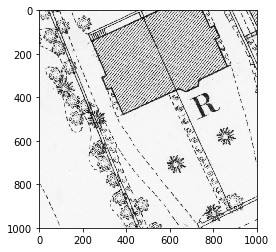

In [0]:
img_segment = segments[(1000,2000)].copy()
plt.imshow(img_segment,cmap="Greys_r")

## Feature Extraction: Low-level descriptors

The content-based analysis of (Uhl et al. 2018) uses, what they refer to as, "low-level descriptors"--which are "color-histogram based moments (i.e., mean, standard deviation, skewness, and kurtosis) computed for each image channel in the RGB color space".

Below, we explain what these "histogram-based moments" actually involve, and what they can tell us about (patches) of the maps.

More generally, the task we engage with here is "feature extraction": the process of re-presenting data by extracting (what we hope) are characteristic aspects. The intuition of Uhl et al., is that histogram-based moments produce excellent features that aptly characterize map images. 


### From matrices to vectors

Ok, now some action. Less: bla bla bla; more: variables, variables, variables

You undoubtedly remember that grayscale images (in Python) come as `numpy.ndarrays`

In [0]:
img_segment = segments[(1000,2000)].copy()
print(type(img_segment))


<class 'numpy.ndarray'>


To inspect the actual object, run the cell below.

In [0]:
img_segment

array([[232, 227, 209, ..., 189, 121,  75],
       [227, 226, 219, ..., 129,  87,  89],
       [225, 224, 227, ...,  77,  88, 130],
       ...,
       [241, 240, 240, ..., 238, 245, 241],
       [240, 240, 240, ..., 242, 242, 242],
       [240, 240, 240, ..., 242, 242, 242]], dtype=uint8)

In algebraic terms, the image is a **matrix**: each value stores the pixel intensity for a specific pair of coordinates. The individual segments are thus matrices of 1000 rows and 1000 columns.

In [0]:
img_segment.shape

(1000, 1000)

In what follows, we reduce the dimensionality of the segments, converting the matrices to **vectors**. We discard the row structure and flatten the segments by concatenating all the rows.

To make this process more intelligible, we provide a straightforward example below.

In [0]:
import numpy as np
matrix = np.array([[0,1],[2,3]])
print('This is a matrix')
print(matrix)
print("\n")
vector = matrix.reshape(-1)
print("This is the matrix turned into a vector")
print(vector)

This is a matrix
[[0 1]
 [2 3]]


This is the matrix turned into a vector
[0 1 2 3]


Applying `.reshape(-1)` to a matrix, squashes it to a vector.

In [0]:
img_segment_vector = img_segment.reshape(-1)

#### Question

What is the length of the vector? Think before you print!

In [0]:
len(img_segment_vector)

1000000

Now we converted the image to a long list of numbers, we  can study the distribution of the pixel values by plotting a [histogram](https://en.wikipedia.org/wiki/Histogram). 

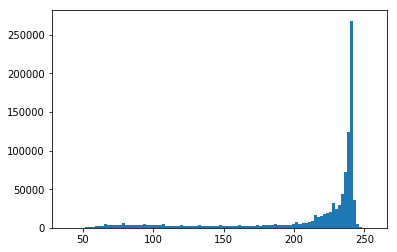

In [0]:
bins = plt.hist(img_segment_vector,bins=100)

The histogram ignores the order in which the pixels appear (i.e. where the pixels of varying intensity are located). It does tell you, however, how often each value occurs. For example, there are around 250.000 pixels with an intensity of around 240.

If you don't believe me, you can inspect the exact values using the code below.

In [0]:
bin_dict = dict(zip(bins[1],bins[0]))
bin_dict[239.88000000000002]

268228.0

So let's compare the histogram of two different images.

Below we
- Select two patches and plot them
- Plot the histogram of pixel values on top of each other.

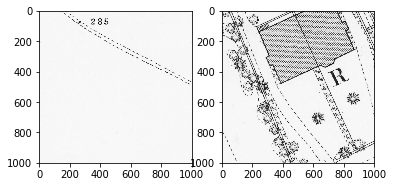

In [0]:
patch_1 = segments[(1000,4000)]
patch_2 = segments[(1000,2000)]
f, axarr = plt.subplots(1,2)
axarr[0].imshow(patch_1,cmap="Greys_r")
axarr[1].imshow(patch_2,cmap="Greys_r")

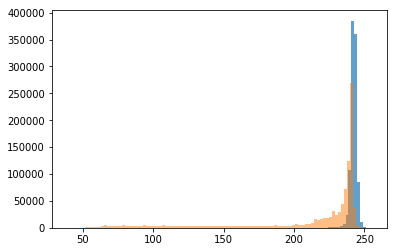

In [0]:
patch_1_vector = patch_1.reshape(-1)
patch_2_vector = patch_2.reshape(-1)
bins1=plt.hist(patch_1_vector,alpha=0.7,bins=100)
bins2=plt.hist(patch_2_vector,alpha=0.5,bins=100)

The previous figure visualises the intuition behind Uhl et al., namely: the distribution of the pixel values captures crucial differences between images (again, since their maps are more colourful they can exploit information from all three RGB channels, while we only use the grayscale representation of the OS maps).

**Question**: Compare the histogram from different images, how do visual differences return in the histograms?


Write **answer** here.


Furthermore, Uhl et al. attempt to summarise these differences using just four different metrics (mean, standard deviation, skew and kurtosis) and use these as features.

Put differently, they reduce an image to a vector of just four numbers that capture the distribution of pixel values.

The question is, are these features an apt representation for clustering image (segments)?

Below we show how to calculate these low-level descriptors and explain their rationale.

### Mean and Standard deviation

According to Uhl et al., "mean and standard deviation characterize hue, brightness, and contrast levels of an image".

Numpy provides several functions for calculating these values
- `np.mean()`
- `np.std()`

Below we 
- select a patch from the map
- plot the distribution of pixel values
- compute the mean and standard deviation

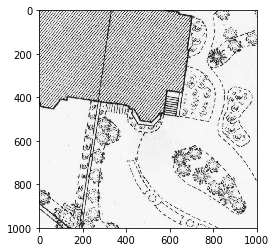

In [0]:
patch_3 = segments[(0,2000)]
plt.imshow(patch_3,cmap="Greys_r")

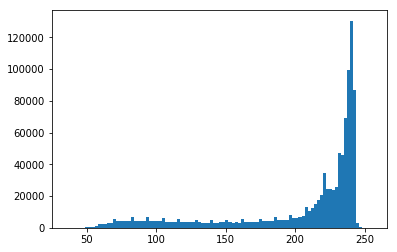

In [0]:
vector_patch_3 = patch_3.reshape(-1)
bins3 = plt.hist(vector_patch_3,bins=100)

In [0]:
np.mean(vector_patch_3)

204.289523

In [0]:
np.std(vector_patch_3)

50.928291051560635

#### Exercise

Compare these values to the image patch at location (4000,5000)

In [0]:
# Enter code here

To assess the extent to which these computations make sense, let's sort the segments by the mean pixel intensity.

Here we turn again to dictionaries. More precisely we
- use [dictionary comprehension](https://www.geeksforgeeks.org/python-dictionary-comprehension/) to map image coordinates to the mean pixel intensity
- sort images by the average pixel intensity and print those with lowest scores (see [`sorted()`](https://www.geeksforgeeks.org/sorted-function-python/)).
- plot the image with the lowest mean score (which should correspond to the "darkest" image on the map)

In [0]:
segmentsbyintensity = {key: np.mean(value.reshape(-1)) for key,value in segments.items()}

In [0]:
sorted(segmentsbyintensity.items(),key = lambda x:x[1], reverse=False)[:10]

[((2000, 1000), 202.875198),
 ((0, 2000), 204.289523),
 ((3000, 1000), 204.40602),
 ((5000, 0), 205.618919),
 ((0, 1000), 207.198875),
 ((1000, 2000), 210.683542),
 ((4000, 0), 214.008576),
 ((1000, 1000), 214.909659),
 ((2000, 2000), 219.860871),
 ((2000, 0), 222.743557)]

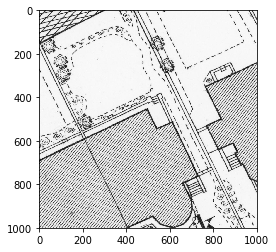

In [0]:
plt.imshow(segments[(2000, 1000)],cmap='Greys_r')

#### Exercise

What happens if you change the value of the `reverse` attribute in `sorted()` from `False` to `True`?

In [0]:
# enter code here

We can apply the same technique to sort images by standard deviation.

In [0]:
segmentsbydeviation = {key: np.std(value.reshape(-1)) for key,value in segments.items()}
sorted(segmentsbydeviation.items(),key = lambda x:x[1], reverse=True)[:10]

[((5000, 0), 54.459238979914495),
 ((2000, 1000), 53.08761413419139),
 ((0, 1000), 52.51355333372875),
 ((3000, 1000), 51.79533353266102),
 ((0, 2000), 50.928291051560635),
 ((1000, 2000), 49.52595850999995),
 ((1000, 1000), 48.486943144559234),
 ((4000, 0), 48.17140409467244),
 ((2000, 0), 46.244706205010665),
 ((2000, 2000), 45.394655589852874)]

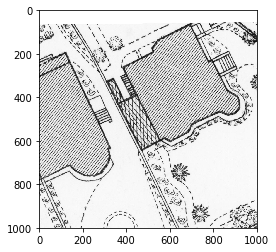

In [0]:
plt.imshow(segments[(5000, 0)],cmap='Greys_r')

#### Question
The ranking is similar but not same. Inspect the differences to understand what visual aspects the mean and standard deviation capture.

Write **answer** here.

### Kurtosis and skewness

Lastly, we turn to kurtosis and skew.

[From Wikipedia](https://en.wikipedia.org/wiki/Main_Page)
- [Kurtosis](https://en.wikipedia.org/wiki/Kurtosis): "is a measure of the "tailedness" of the probability distribution of a real-valued random variable." 
- [Skew](https://en.wikipedia.org/wiki/Skewness):"is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean."

Uhl et al., write:"" skewness and kurtosis indicate the symmetry and flatness of the probability density of the color distributions, and thus reflect color spread and
variability of an image"

In [0]:
from scipy.stats import kurtosis, skew

In [0]:
segmentsbykurtosis = {key: kurtosis(value.reshape(-1)) for key,value in segments.items()}
sorted(segmentsbykurtosis.items(),key = lambda x:x[1], reverse=True)[:10]

[((4000, 9000), 1418.7514446238363),
 ((5000, 9000), 767.5548008131366),
 ((7000, 4000), 747.890598195985),
 ((3000, 3000), 715.6186226106992),
 ((9000, 0), 709.6361126447339),
 ((13000, 3000), 637.8565535787179),
 ((8000, 4000), 621.0456252353031),
 ((10000, 6000), 614.4542224085162),
 ((12000, 3000), 583.2471591128806),
 ((8000, 8000), 580.608575382363)]

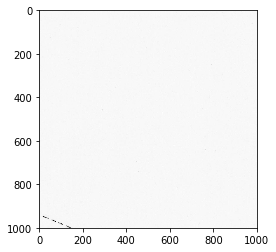

In [0]:
plt.imshow(segments[(4000, 9000)],cmap='Greys_r')

In [0]:
segmentsbyskew = {key: skew(value.reshape(-1)) for key,value in segments.items()}
sorted(segmentsbyskew.items(),key = lambda x:x[1], reverse=False)[:10]

[((4000, 9000), -30.180329970913217),
 ((3000, 3000), -24.01287315893577),
 ((7000, 4000), -23.414508951355593),
 ((5000, 9000), -23.005744445749844),
 ((8000, 4000), -22.591036855716332),
 ((6000, 2000), -22.24885736543225),
 ((9000, 0), -21.584104857495234),
 ((12000, 3000), -21.26329048499384),
 ((8000, 8000), -21.241665862735566),
 ((14000, 0), -21.217163688600795)]

### Putting everything together

Now we can pack all these descriptors together in one function. 

`describe_image` requires an image as input and returns a vector with the following shape:
[image_mean, image_standard_deviation, image_kurtosis, image_skew]

In [0]:
def describe_image(image):
  vector = image.reshape(-1)
  return [np.mean(vector),np.std(vector),kurtosis(vector),skew(vector)]

To see how this works inspect the code below.

[210.683542, 49.52595850999995, 1.8267458468867366, -1.7726245809476813]


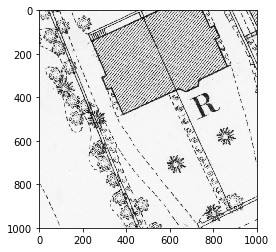

In [0]:
sampled_image = segments[(1000,2000)]
print(describe_image(sampled_image))
plt.imshow(sampled_image,cmap="Greys_r")


With the dictionary comprehension we encountered earlier, we can vectorize all segments and extract low-level descriptors.

In [0]:
from tqdm import tqdm_notebook
coord2lldescr = {key : describe_image(value) for key,value in tqdm_notebook(segments.items())} 

In [0]:
coord2lldescr[(1000,2000)]

[210.683542, 49.52595850999995, 1.8267458468867366, -1.7726245809476813]

Voila!

## The TSNE cherry on the cake

For those interested in further analysis of these images, please consult the code below.

Basically, it applies dimensionality reduction to group images by their visual similarity. 


The question then is: does the previous approach help distinguishing important differences among map segments.

We follow the TSNE procedure proposed by (Uhl et al., 2018).

In [0]:
from itertools import product
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [0]:
descr = [(idx,key,describe_image(value)) for idx,(key,value) in enumerate(segments.items())]

In [0]:
tsne = TSNE(n_components=2, random_state=0)

In [0]:
scaler = StandardScaler()
X  = scaler.fit_transform([e[-1] for e in descr])
X_2d = tsne.fit_transform(X)


As the images on the top-left corner look different (i.e. contain housing) we coloured them blue, the others are coloured green.

In [0]:
colors = ['b' if (coord[1] < 3000 and coord[0] < 5000) else 'g' for idx,coord,des in descr]


No handles with labels found to put in legend.


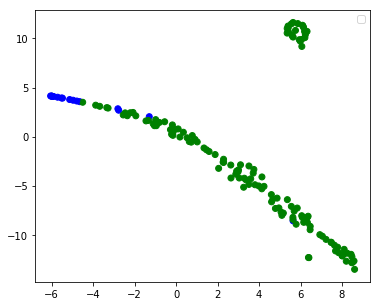

In [0]:
plt.figure(figsize=(6, 5))
x = [i for i,j in X_2d]; y = [j for i,j in X_2d]; 
plt.scatter(x,y,c=colors)
plt.legend()
plt.show()

Below we inspect the the clusters.

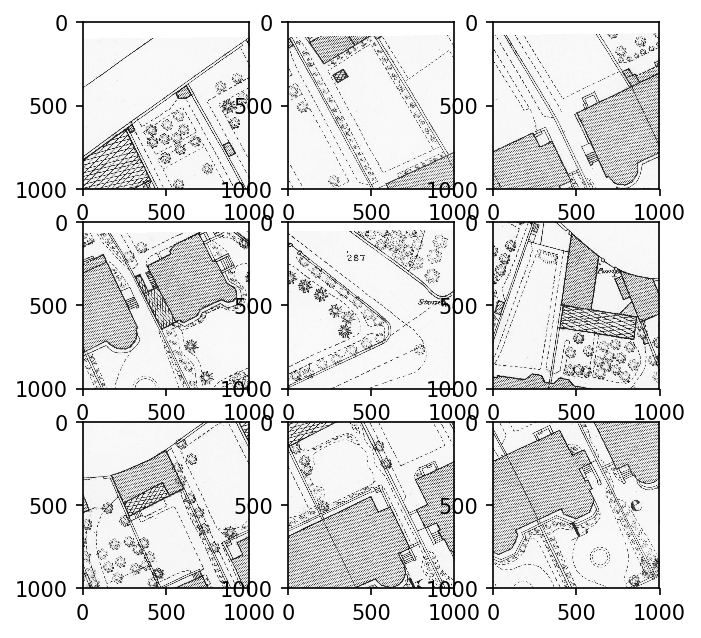

In [0]:
idx2coord = {idx:coord for idx,coord,des in descr}
x_outliers_idx = [idx2coord[idx] for idx,location in enumerate(x) if location < -4.0] 

from itertools import product
img_coord = product(range(3),range(3))
f,axarr = plt.subplots(3,3,figsize=(5,5),dpi=150)
for i,coord in enumerate(img_coord):
  axarr[tuple(coord)].imshow(segments[x_outliers_idx[i]],cmap='Greys_r')


In [0]:
idx2coord = {idx:coord for idx,coord,des in descr}
y_outliers_idx = [idx2coord[idx] for idx,location in enumerate(y) if location > 5] 
y_outliers_idx

[(12000, 0),
 (13000, 1000),
 (14000, 1000),
 (5000, 2000),
 (8000, 2000),
 (11000, 2000),
 (4000, 3000),
 (5000, 3000),
 (6000, 3000),
 (6000, 5000),
 (8000, 6000),
 (1000, 7000),
 (2000, 7000),
 (3000, 7000),
 (4000, 7000),
 (5000, 7000),
 (10000, 7000),
 (12000, 7000),
 (1000, 8000),
 (2000, 8000),
 (3000, 8000),
 (4000, 8000),
 (5000, 8000),
 (7000, 8000)]

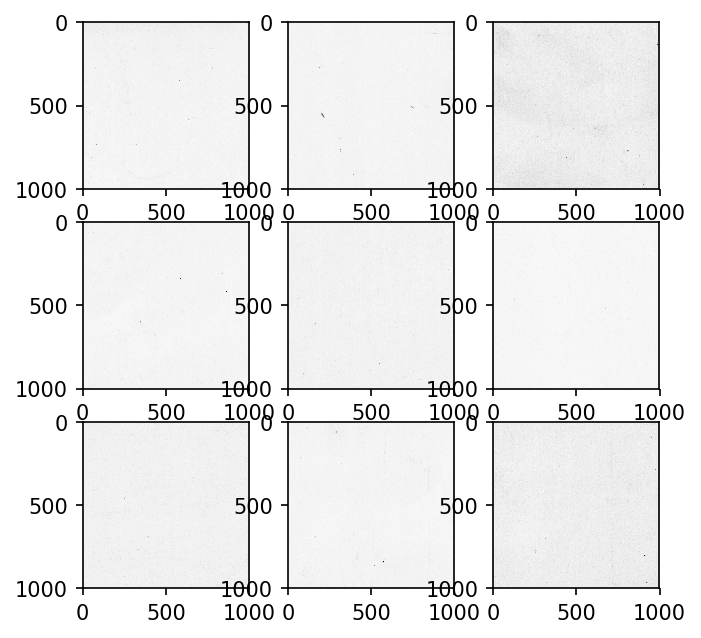

In [0]:
img_coord = product(range(3),range(3))
f,axarr = plt.subplots(3,3,figsize=(5,5),dpi=150)
for i,coord in enumerate(img_coord):
  axarr[tuple(coord)].imshow(segments[y_outliers_idx[i]],cmap='Greys_r')
